In [105]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [106]:
# Load your dataset
data = pd.read_csv('dataset\Assisiation.csv')

# get categorical columns
columns = [col for col in data.columns if data[col].dtype == 'object']

# encode categorical variables
data_K = pd.get_dummies(data, columns)
 
pipe = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=2))])


In [107]:
# Fit the model
pipe.fit(data_K)

# Get the labels
labels = pipe.predict(data_K)

# Add the labels to your data
data['cluster'] = labels

c:\Users\Khaled Hesham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [108]:
data.head(10)

,VerificationType,LanguageCode,Gender,Country,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,...,loanStatus,MonthlyPayment,AppliedAmount,Amount,IncomeTotal,PrincipalBalance,InterestAndPenaltyPaymentsMade,NoOfPreviousLoansBeforeLoan,ExistingLiabilities,cluster
0,Income and expenses verified,Estonian,Woman,Estonia,Secondary Education,Cohabitant,Retiree,MoreThan5Years,Other,Owner,...,defaulted,62.05,2125.0,2125.0,354.0,1045.59,1187.910,1.0,8.0,0
1,Income unverified,Estonian,Woman,Estonia,Higher education,Cohabitant,Entrepreneur,MoreThan5Years,Retail and wholesale,Owner,...,defaulted,84.75,3000.0,3000.0,900.0,1403.59,360.070,1.0,4.0,0
2,Income and expenses verified,Estonian,Male,Estonia,Secondary Education,Divorced,Entrepreneur,UpTo3Years,Transport and warehousing,Mortage,...,defaulted,268.57,9121.5,9100.0,1200.0,787.59,1620.385,0.0,7.0,0
3,Income verified,Spanish,Male,Spain,Basic education,Married,Fully employed,UpTo5Years,Other,Living with parents,...,defaulted,63.53,1500.0,1500.0,863.0,1654.77,355.920,0.0,1.0,1
4,Income and expenses verified,Spanish,Woman,Spain,Secondary Education,Divorced,Retiree,UpTo1Year,Other,"Tenant, pre-furnished property",...,defaulted,101.19,1595.0,1090.0,697.0,1840.58,0.000,0.0,5.0,1
5,Income and expenses verified,Spanish,Woman,Spain,Secondary Education,Married,Fully employed,UpTo5Years,Retail and wholesale,"Tenant, unfurnished property",...,defaulted,243.19,3720.0,775.0,970.0,2238.73,0.000,0.0,5.0,1
6,Income verified,Estonian,Male,Estonia,Basic education,Single,Fully employed,UpTo1Year,Hospitality and catering,"Tenant, unfurnished property",...,defaulted,27.12,635.0,635.0,745.0,1190.59,422.750,0.0,1.0,0
7,Income unverified,Spanish,Male,Spain,Vocational education,Cohabitant,Retiree,MoreThan5Years,Other,Owner,...,not defaulted,116.95,1000.0,1000.0,1126.0,1111.59,403.890,0.0,2.0,1
8,Income and expenses verified,Finnish,Male,Finland,Secondary Education,Married,Fully employed,MoreThan5Years,Finance and insurance,Owner,...,defaulted,185.35,4000.0,4000.0,2590.0,1050.59,1567.360,0.0,8.0,1
9,Income unverified,Estonian,Male,Estonia,Secondary Education,Divorced,Fully employed,UpTo5Years,Transport and warehousing,Joint tenant,...,not defaulted,162.01,5000.0,5000.0,1000.0,1675.59,1620.385,1.0,8.5,0


In [109]:
# save the dataset with cluser column
data.to_csv('dataset\Assisiation_cluster.csv', index=False)

In [110]:
#compare with actual class labels
print(data['cluster'].value_counts())
print("------------------------------------")
print(data['loanStatus'].value_counts())

cluster
0    22175
1    14089
Name: count, dtype: int64
------------------------------------
loanStatus
defaulted        20097
not defaulted    16167
Name: count, dtype: int64


In [111]:
# get accuracy of the model
accuracy = (data['cluster'] == data['loanStatus'].replace({"defaulted":1,"not defaulted":0})).mean()
print(f'Accuracy: {accuracy*100:.2f}%')


Accuracy: 64.47%


C:\Users\Khaled Hesham\AppData\Local\Temp\ipykernel_21524\1504058205.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  accuracy = (data['cluster'] == data['loanStatus'].replace({"defaulted":1,"not defaulted":0})).mean()


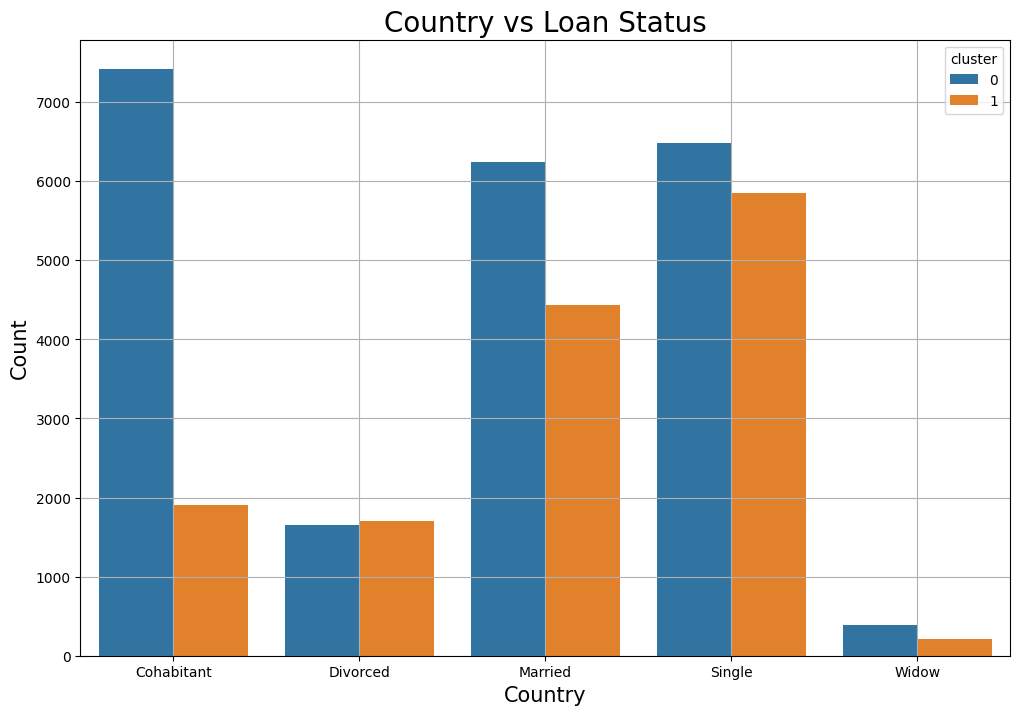

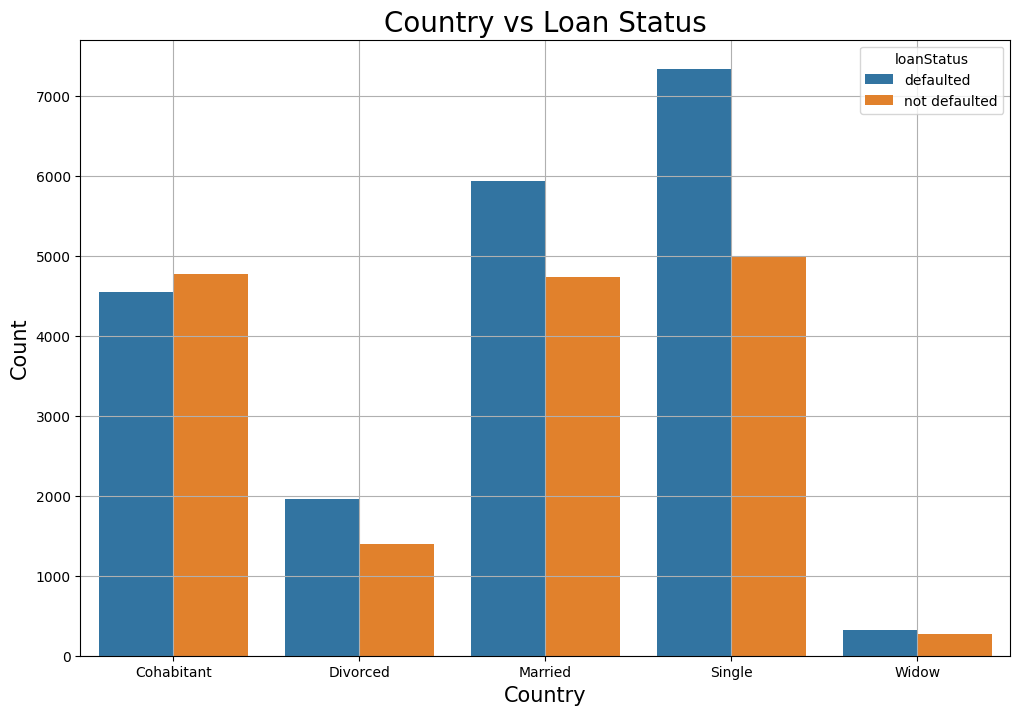

In [114]:
# visualize the clusters compared to the actual class labels on any 2 features
plt.figure(figsize=(12,8))
sns.countplot(x='MaritalStatus',data=data,hue='cluster')
plt.title('Country vs Loan Status', fontsize=20)
plt.xlabel('Country', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.grid(True)
plt.show()



plt.figure(figsize=(12,8))
sns.countplot(x='MaritalStatus',data=data,hue='loanStatus')
plt.title('Country vs Loan Status', fontsize=20)
plt.xlabel('Country', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.grid(True)
plt.show()

